Análisis de anomalías de tráfico utilizando la librería IsolationForest de Sklearn.
Utilizando las muestras de datos del ejemplo supervisado, se modificó el primer
dataset quitando el comportamiento del malware para utilizarlo como trafico normal

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import MinMaxScaler
import mglearn
from sklearn.decomposition import PCA

Dataset base sin malware es el comportamiento que deseamos enseñar a nuestro modelo

In [3]:
dataframe = pd.read_csv('traficoNoSupervisado.csv', index_col = 'Time')

dataframe['Count'] = np.nan

dataframe

,No.,Src Port,Dst Port,Source,Destination,Protocol,Length,Count
Time,,,,,,,,
2017-01-19 18:09:44,1,49286.0,80.0,10.1.19.102,192.185.225.245,TCP,66,NaN
2017-01-19 18:09:44,2,80.0,49286.0,192.185.225.245,10.1.19.102,TCP,60,NaN
2017-01-19 18:09:44,3,49286.0,80.0,10.1.19.102,192.185.225.245,TCP,60,NaN
2017-01-19 18:09:44,4,49286.0,80.0,10.1.19.102,192.185.225.245,HTTP,540,NaN
2017-01-19 18:09:44,5,80.0,49286.0,192.185.225.245,10.1.19.102,TCP,60,NaN
...,...,...,...,...,...,...,...,...
2019-12-02 01:00:12,1496,52818.0,443.0,192.168.1.158,172.217.172.68,TCP,66,NaN
2019-12-02 01:00:12,1497,443.0,52818.0,172.217.172.68,192.168.1.158,TLSv1.3,1484,NaN
2019-12-02 01:00:12,1498,443.0,52818.0,172.217.172.68,192.168.1.158,TLSv1.3,1183,NaN


Se filtran los datos reagrupando los repetidos y se guarda un conteo de ellos en una nueva fila

In [4]:
df = dataframe.groupby(['Time', 'Src Port', 'Dst Port', 'Source', 'Protocol', 'Length']).size().reset_index(name='counts')
dfc= df.copy()

Se crea un objeto LabelEncoder() para codificar los datos no numéricos y poder escalarlos 
para crear relaciones y poder graficarlos.

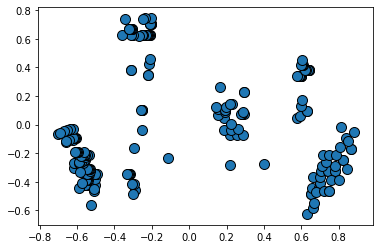

In [5]:
encoder = LabelEncoder()

dfc['Time'] = encoder.fit_transform(dfc['Time'])
dfc['Src Port'] = encoder.fit_transform(dfc['Src Port'])
dfc['Dst Port'] = encoder.fit_transform(dfc['Dst Port'])
dfc['Source'] = encoder.fit_transform(dfc['Source'])
dfc['Protocol'] = encoder.fit_transform(dfc['Protocol'])

esc = dfc
escala = MinMaxScaler()
escala.fit(esc)
escalada = escala.transform(esc)
pca=PCA(n_components=2)
pca.fit(escalada)
transformada=pca.transform(escalada)

mglearn.discrete_scatter(transformada[:,0], transformada[:,1])


Objeto del modelo IsolationForest

In [6]:
modelo = IsolationForest(n_estimators=100, max_samples=256, contamination=0.02)

In [7]:
# Se entrena el modelo con los datos 
modelo.fit(transformada)

/home/zentraedi/.local/lib/python3.7/site-packages/sklearn/ensemble/_iforest.py:281: UserWarning: max_samples (256) is greater than the total number of samples (204). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples))


IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.02,
                max_features=1.0, max_samples=256, n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [8]:
predict = modelo.predict(transformada)

El modelo reconoce el tráfico como normal, excepto dos puntos

In [9]:
df["Type"] = predict

df[-40:]

,Time,Src Port,Dst Port,Source,Protocol,Length,counts,Type
164,2019-12-02 01:00:09,52818.0,443.0,192.168.1.158,TLSv1.3,236,1,1
165,2019-12-02 01:00:09,52818.0,443.0,192.168.1.158,TLSv1.3,495,1,1
166,2019-12-02 01:00:09,52818.0,443.0,192.168.1.158,TLSv1.3,696,1,1
167,2019-12-02 01:00:10,53.0,34593.0,200.42.4.199,DNS,103,1,1
168,2019-12-02 01:00:10,443.0,53860.0,172.217.30.234,TCP,66,4,1
169,2019-12-02 01:00:10,443.0,53860.0,172.217.30.234,TCP,74,1,1
170,2019-12-02 01:00:10,443.0,53860.0,172.217.30.234,TLSv1.3,97,1,1
171,2019-12-02 01:00:10,443.0,53860.0,172.217.30.234,TLSv1.3,105,1,1
172,2019-12-02 01:00:10,443.0,53860.0,172.217.30.234,TLSv1.3,278,1,1
173,2019-12-02 01:00:10,443.0,53860.0,172.217.30.234,TLSv1.3,383,1,1


Con un nuevo set de datos se volverá a entrenar el modelo, este dataset contiene comportamiento de malware.

In [10]:
dataframe2 = pd.read_csv('trafico_prueba_2016.csv', index_col = 'Time')

dataframe2['Count'] = np.nan

dataframe2

,Src Port,Dst Port,Source,Destination,Protocol,Length,Count
Time,,,,,,,
2016-12-21 20:57:50,49276,80,10.12.21.103,46.4.75.100,TCP,66,NaN
2016-12-21 20:57:50,80,49276,46.4.75.100,10.12.21.103,TCP,60,NaN
2016-12-21 20:57:50,49276,80,10.12.21.103,46.4.75.100,TCP,60,NaN
2016-12-21 20:57:50,49276,80,10.12.21.103,46.4.75.100,HTTP,299,NaN
2016-12-21 20:57:50,80,49276,46.4.75.100,10.12.21.103,TCP,60,NaN
...,...,...,...,...,...,...,...
2016-12-21 21:09:31,49163,80,10.12.21.103,84.200.4.130,TCP,60,NaN
2016-12-21 21:10:36,80,49163,84.200.4.130,10.12.21.103,TCP,60,NaN
2016-12-21 21:10:36,49163,80,10.12.21.103,84.200.4.130,TCP,60,NaN


Se realiza el mismo procedimiento para filtrar, codificar y escalar los datos, utilizando los mismos objetos de cada clase 

In [11]:
df2 = dataframe2.groupby(['Time', 'Src Port', 'Dst Port', 'Source', 'Protocol', 'Length']).size().reset_index(name='counts')
dfpredict2 = df2.copy()
df2[-20:]

,Time,Src Port,Dst Port,Source,Protocol,Length,counts
56,2016-12-21 20:58:00,80,49317,195.133.201.36,TCP,1514,49
57,2016-12-21 20:58:00,49317,80,10.12.21.103,TCP,60,52
58,2016-12-21 20:58:01,49317,80,10.12.21.103,TCP,60,1
59,2016-12-21 20:58:07,60148,6892,10.12.21.103,UDP,67,319
60,2016-12-21 20:58:08,60148,6892,10.12.21.103,UDP,67,256
61,2016-12-21 20:58:09,60148,6892,10.12.21.103,UDP,67,1
62,2016-12-21 20:59:00,80,49315,195.133.201.36,TCP,60,1
63,2016-12-21 20:59:00,49315,80,10.12.21.103,TCP,60,1
64,2016-12-21 20:59:33,80,49315,195.133.201.36,TCP,60,1
65,2016-12-21 20:59:33,49315,80,10.12.21.103,TCP,60,1


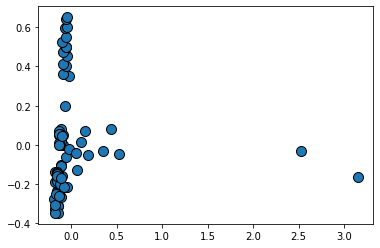

In [12]:
dfpredict2['Time'] = encoder.fit_transform(dfpredict2['Time'])
dfpredict2['Src Port'] = encoder.fit_transform(dfpredict2['Src Port'])
dfpredict2['Dst Port'] = encoder.fit_transform(dfpredict2['Dst Port'])
dfpredict2['Source'] = encoder.fit_transform(dfpredict2['Source'])
dfpredict2['Protocol'] = encoder.fit_transform(dfpredict2['Protocol'])

escalada2 = escala.transform(dfpredict2)
pca2=PCA(n_components=2)
pca2.fit(escalada2)
transformada2=pca2.transform(escalada2)

mglearn.discrete_scatter(transformada2[:,0], transformada2[:,1])

Se vuelve a entrenar el modelo con los nuevos datos con malware

In [13]:
predict2 = modelo.fit(transformada2)

/home/zentraedi/.local/lib/python3.7/site-packages/sklearn/ensemble/_iforest.py:281: UserWarning: max_samples (256) is greater than the total number of samples (76). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples))


Predicción de los datos nuevos

In [14]:
pre = modelo.predict(transformada2)
df2["Type"] = pre
df2[-30:]

,Time,Src Port,Dst Port,Source,Protocol,Length,counts,Type
46,2016-12-21 20:57:59,80,49317,195.133.201.36,TCP,1395,33,1
47,2016-12-21 20:57:59,80,49317,195.133.201.36,TCP,1514,20,1
48,2016-12-21 20:57:59,49317,80,10.12.21.103,TCP,60,24,1
49,2016-12-21 20:58:00,80,49317,195.133.201.36,TCP,419,2,1
50,2016-12-21 20:58:00,80,49317,195.133.201.36,TCP,681,1,1
51,2016-12-21 20:58:00,80,49317,195.133.201.36,TCP,1038,2,1
52,2016-12-21 20:58:00,80,49317,195.133.201.36,TCP,1046,1,1
53,2016-12-21 20:58:00,80,49317,195.133.201.36,TCP,1157,4,1
54,2016-12-21 20:58:00,80,49317,195.133.201.36,TCP,1276,25,1
55,2016-12-21 20:58:00,80,49317,195.133.201.36,TCP,1395,67,1


In [ ]:
Se vuelve a probar el nuevo modelo con otro dataset, realizando los mismos métodos 
para reagrupar, codificar y transformar los datos e implementarlos en el modelo.

In [213]:
dataframe3 = pd.read_csv('trafico_prueba_2017.csv', index_col = 'Time')

dataframe3['Count'] = np.nan

In [214]:
df3 = dataframe3.groupby(['Time', 'Src Port', 'Dst Port', 'Source', 'Protocol', 'Length']).size().reset_index(name='counts')
dfpredict3 = df3.copy()

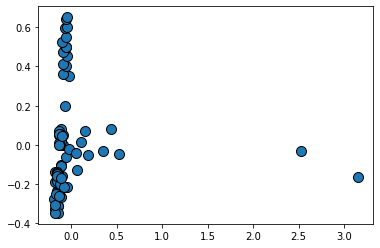

In [215]:
dfpredict3['Time'] = encoder.fit_transform(dfpredict3['Time'])
dfpredict3['Src Port'] = encoder.fit_transform(dfpredict3['Src Port'])
dfpredict3['Dst Port'] = encoder.fit_transform(dfpredict3['Dst Port'])
dfpredict3['Source'] = encoder.fit_transform(dfpredict3['Source'])
dfpredict3['Protocol'] = encoder.fit_transform(dfpredict3['Protocol'])

escalada3 = escala.transform(dfpredict3)
pca3=PCA(n_components=2)
pca3.fit(escalada3)
transformada3=pca3.transform(escalada3)

mglearn.discrete_scatter(transformada3[:,0], transformada3[:,1])

Prediccion de los datos utilizando el nuevo modelo

In [216]:
prediccion = modelo.predict(transformada3)
df3["Type"] = prediccion
df3[-40:]

,Time,Src Port,Dst Port,Source,Protocol,Length,counts,Type
36,2016-12-21 20:57:55,80,49315,195.133.201.36,TCP,1514,6,1
37,2016-12-21 20:57:55,49315,80,10.12.21.103,TCP,60,6,1
38,2016-12-21 20:57:57,49317,80,10.12.21.103,TCP,66,1,1
39,2016-12-21 20:57:58,80,49317,195.133.201.36,TCP,60,2,1
40,2016-12-21 20:57:58,49317,80,10.12.21.103,HTTP,521,1,1
41,2016-12-21 20:57:58,49317,80,10.12.21.103,TCP,60,1,1
42,2016-12-21 20:57:59,80,49317,195.133.201.36,TCP,92,1,1
43,2016-12-21 20:57:59,80,49317,195.133.201.36,TCP,919,1,1
44,2016-12-21 20:57:59,80,49317,195.133.201.36,TCP,1157,1,1
45,2016-12-21 20:57:59,80,49317,195.133.201.36,TCP,1276,13,1
